In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Loading the test and training data. We have used the dataset of Amazon Product Reviews
data = 'train.csv'
test_data = 'test.csv'
products = pd.read_csv(data,header=None,names=['Rating','Title','Review'],encoding='utf-8')
display(products)
products = products[0:100000] #Choosing only first 1000000 rows for the training. We can also randomize it
display(products)

,Rating,Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...
...,...,...,...
2999995,1,Don't do it!!,The high chair looks great when it first comes...
2999996,2,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
2999997,2,"compact, but hard to clean","We have a small house, and really wanted two o..."
2999998,3,Hard to clean!,I agree with everyone else who says this chair...


,Rating,Title,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...
...,...,...,...
99995,2,Disappointing,"While this book starts off well, it quickly go..."
99996,1,Bad service,"The product never was received, I had to conta..."
99997,1,Peasants in Arms,If you want a more balanced look at the Contra...
99998,1,This book is trash,Having been in Nicaragua before and during the...


In [3]:
# Doing same as we did for the training data
test_df = pd.read_csv(test_data,header=None,names=['Rating','Title','Review'])
display(test_df)
test_df = test_df[0:100000]
display(test_df)

,Rating,Title,Review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."
...,...,...,...
649995,5,Pretty Cool!,We got it for our mom's birthday. She LOVES it...
649996,5,great cd,"this cd is very good. i especially love ""cats ..."
649997,2,An interesting look into Boston's comedy clubs,This was a good documentary on the history of ...
649998,5,Du vol...pour les cowboys!,Avez-vous déjà vu un CD double et un DVD avec ...


,Rating,Title,Review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."
...,...,...,...
99995,3,Mediocre for Woody Allen,"""Manhattan"" is good, and a must-have for Woody..."
99996,1,Don't buy this old disc. New 2-disc coming out...,This DVD was released when DVDs first started ...
99997,3,5 stars for the film 1 star for the DVD,Purple Rain is a classic film. It was an unexp...
99998,3,Uninspiring,"I found some of the ""habits"" to be either obvi..."


In [4]:
# Counting the number of each ratings (i.e. how many counts is for rating '1' or '2' etc.)
products["Rating"].value_counts()

Rating
3    20558
5    20161
2    20107
4    19986
1    19188
Name: count, dtype: int64

In [5]:
test_df["Rating"].value_counts()

Rating
5    20505
3    20192
2    19994
4    19809
1    19500
Name: count, dtype: int64

In [6]:
len(products)-len(products.dropna())

9

In [7]:
len(test_df)-len(test_df.dropna())

5

In [8]:
# Dropping the rows containing NULL values
test_df = test_df.dropna()
len(test_df)

99995

In [9]:
len(products)

100000

In [10]:
products = products.dropna()
len(products)

99991

In [11]:
# Removing the ratings which has value '3' as it may be good or bad.
products = products[products['Rating'] != 3]
test_df = test_df[test_df['Rating']!=3]

In [12]:
# Adding the sentiment to training data.
def sentiment(n):
    return 1 if n >= 4 else 0
products['Sentiment'] = products['Rating'].apply(sentiment)
products.head()

,Rating,Title,Review,Sentiment
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,1
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,1
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,1
5,5,There's a reason for the price,"There's a reason this CD is so expensive, even...",1


In [13]:
# Applying the sentiment to test data.
test_df['Sentiment'] = test_df['Rating'].apply(sentiment)
test_df.head()

,Rating,Title,Review,Sentiment
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ...",0
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...,1
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...,0
3,2,Oh dear,I was excited to find a book ostensibly about ...,0
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod...",0


In [14]:
# Choosing training and testing data
X_train = products['Review']
y_train = products['Sentiment']
test_x = test_df['Review']

In [15]:
# Scaling the data by removing the stop words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert frozenset to list to avoid InvalidParameterError
cv = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS))

'''This method "fits" the vectorizer to the training data by learning the vocabulary (i.e., unique words) in the training data and 
their corresponding frequency counts, and then "transforms" the text data into a document-term matrix'''
ctmTr = cv.fit_transform(X_train)
test_dtm = cv.transform(test_x)

In [16]:
#Linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

model = LogisticRegression(max_iter=2000)
model.fit(ctmTr, y_train)

LogisticRegression(max_iter=2000)

In [17]:
test_pred_lr = model.predict(test_dtm)
test_pred_lr

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
test_y = test_df['Sentiment']
accuracy_score(test_y,test_pred_lr)

0.824968986128341

In [19]:
print(classification_report(test_y, test_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     39493
           1       0.82      0.84      0.83     40310

    accuracy                           0.82     79803
   macro avg       0.83      0.82      0.82     79803
weighted avg       0.83      0.82      0.82     79803



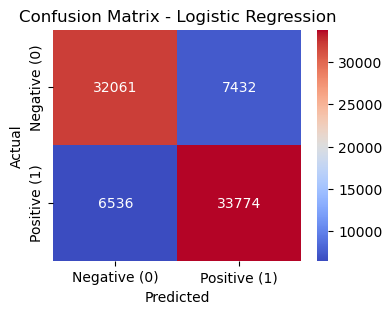

In [20]:
cm_lr = confusion_matrix(test_y, test_pred_lr)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=["Negative (0)", "Positive (1)"], 
            yticklabels=["Negative (0)", "Positive (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [21]:
#Support Vector Machine model
from sklearn import svm
svm_model = svm.SVC(kernel='linear', C=1.0, max_iter=2000)
svm_model.fit(ctmTr, y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=2000)

In [22]:
test_pred_svm = svm_model.predict(test_dtm)
test_pred_svm

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [23]:
accuracy_score(test_y,test_pred_svm)

0.6312294024034184

In [24]:
print(classification_report(test_y, test_pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.50      0.58     39493
           1       0.61      0.76      0.67     40310

    accuracy                           0.63     79803
   macro avg       0.64      0.63      0.62     79803
weighted avg       0.64      0.63      0.63     79803



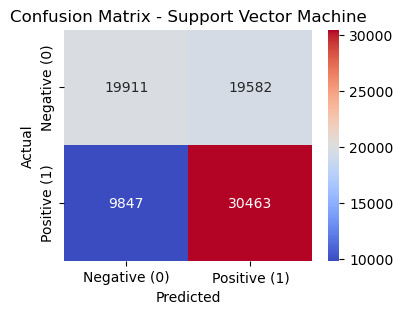

In [25]:
cm_svm = confusion_matrix(test_y, test_pred_svm)
plt.figure(figsize=(4,3))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=["Negative (0)", "Positive (1)"], 
            yticklabels=["Negative (0)", "Positive (1)"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [26]:
new_reviews = ["The product is amazing!", "Not bad"]
new_vectors = cv.transform(new_reviews)

In [27]:
new_predictions_lr = model.predict(new_vectors)

for review, sentiment in zip(new_reviews, new_predictions_lr):
    print(f"Review: {review} -> Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")

Review: The product is amazing! -> Sentiment: Positive
Review: Not bad -> Sentiment: Negative


In [28]:
new_predictions_svm = svm_model.predict(new_vectors)

for review, sentiment in zip(new_reviews, new_predictions_svm):
    print(f"Review: {review} -> Sentiment: {'Positive' if sentiment == 1 else 'Negative'}")

Review: The product is amazing! -> Sentiment: Positive
Review: Not bad -> Sentiment: Positive
